<a href="https://colab.research.google.com/github/Istiak1992/RestaurantReviewsAnalysis/blob/main/RestaurantReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurant Customer Reviews Analysis

**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')

**Load Data Set**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [5]:
data = pd.read_csv('Restaurant_Reviews.tsv', sep='\t', on_bad_lines='skip')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
data.isnull().sum()

,0
Review,0
Liked,0


**Check Balance**

In [7]:
data['Liked'].value_counts()

,count
Liked,
1,500
0,500


In [8]:
label_Status = data['Liked'].value_counts()
transactions = label_Status.index
quantity = label_Status.values

figure = px.pie(data,
             values=quantity,
             names=transactions, hole =.60,
             title="Like & Unlike Status")
figure.show()

**Word Clouds**

In [18]:
def plot_wordcloud(Review):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Review)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('word cloud')

positive_reviews = ' '.join(data[data['Liked'] == 0]['Review'])
negative_reviews = ' '.join(data[data['Liked'] == 1]['Review'])


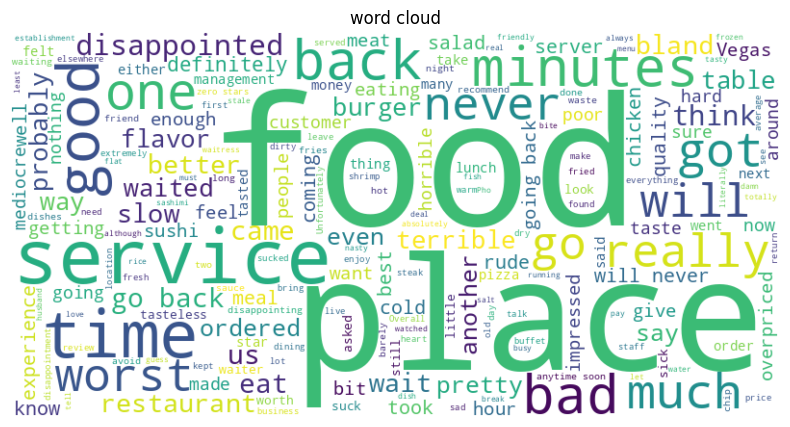

In [19]:
plot_wordcloud(positive_reviews)
plt.show()

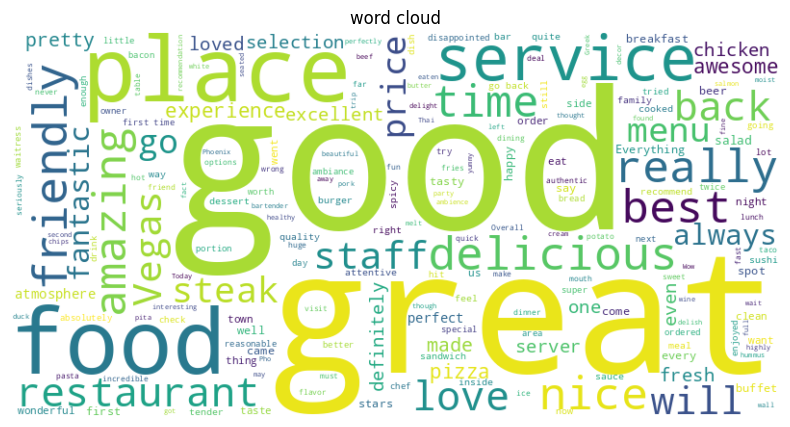

In [20]:

plot_wordcloud(negative_reviews)
plt.show()

**preprocessing**

In [25]:

review_column = "Review"
label_column = "Liked"

In [22]:
import nltk
nltk.download('stopwords')

stopword = set(stopwords.words('english'))
stopword

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [27]:
def preprocess_text(Review):
    # Remove punctuation
    remove_punc = [char for char in Review if char not in string.punctuation]
    clean_words = ''.join(remove_punc) # char joining

    #Remove stopwords
    Review = clean_words
    return Review

In [28]:

data[review_column] = data[review_column].apply(preprocess_text)
data[review_column]

,Review
0,Wow Loved this place
1,Crust is not good
2,Not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
995,I think food should have flavor and texture an...
996,Appetite instantly gone
997,Overall I was not impressed and would not go back
998,The whole experience was underwhelming and I t...


**Lemmatization**

In [30]:

import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(Review):
  lemmatized_review = ''.join([lemmatizer.lemmatize(word) for word in Review])
  return lemmatized_review

data[review_column] = data[review_column].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
data[review_column]

,Review
0,Wow Loved this place
1,Crust is not good
2,Not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
...,...
995,I think food should have flavor and texture an...
996,Appetite instantly gone
997,Overall I was not impressed and would not go back
998,The whole experience was underwhelming and I t...


**TF-IDF Vectorizer**

In [32]:

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data[review_column])
y = data[label_column]

In [33]:
x

<1000x2067 sparse matrix of type '<class 'numpy.float64'>'
	with 9754 stored elements in Compressed Sparse Row format>

In [34]:
y

,Liked
0,1
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,0
998,0


**Train Test Split**

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Evaluate Model**

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(model, x_test, y_test):
    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification report for more detailed metrics (precision, recall, f1-score)
    report = classification_report(y_test, y_pred)

    # Return the results in a dictionary
    return {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Classification Report': report
    }

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

x_train_dense = x_train.toarray()  # Convert sparse matrix to dense
x_test_dense = x_test.toarray()    # Convert sparse matrix to dense

# Fit the model to the training data
gnb.fit(x_train_dense, y_train)

# Make predictions on the test set
y_pred = gnb.predict(x_test_dense)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 68.50%


In [46]:
# Convert x_test to dense format
x_test_dense = x_test.toarray()

# Evaluate the model on the test set
results = evaluate_model(gnb, x_test_dense, y_test)

# Print the results
print(f"Accuracy: {results['Accuracy'] * 100:.2f}%")
print("Confusion Matrix:")
print(results['Confusion Matrix'])
print("Classification Report:")
print(results['Classification Report'])


Accuracy: 68.50%
Confusion Matrix:
[[55 41]
 [22 82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.57      0.64        96
           1       0.67      0.79      0.72       104

    accuracy                           0.69       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.69      0.69      0.68       200



In [49]:
cm = confusion_matrix(y_test, gnb.predict(x_test_dense))
cm

array([[55, 41],
       [22, 82]])

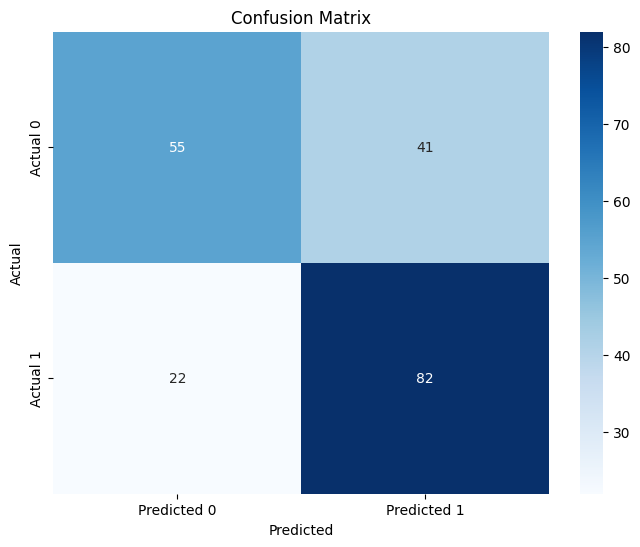

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Input**

In [103]:
random_review = input()

preprocessed_review = preprocess_text(random_review) # remove punctuation
lemmatized_review = lemmatize_text(preprocessed_review) # text scaling
review_vector = vectorizer.transform([lemmatized_review]).toarray()

the food was awesome


In [104]:
prediction = gnb.predict(review_vector)
prediction

array([1])

**Logistic Regression**

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Train the model on the training data
lr.fit(x_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 80.50%
Confusion Matrix:
[[86 10]
 [29 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        96
           1       0.88      0.72      0.79       104

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.80       200
weighted avg       0.82      0.81      0.80       200



In [101]:
random_review = input()

preprocessed_review = preprocess_text(random_review) # remove punctuation
lemmatized_review = lemmatize_text(preprocessed_review) # text scaling
review_vector = vectorizer.transform([lemmatized_review]).toarray()

the food was awesome


In [102]:
prediction = lr.predict(review_vector)
prediction

array([1])

**Random Forest**

In [88]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 71.00%
Confusion Matrix:
[[82 14]
 [44 60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.85      0.74        96
           1       0.81      0.58      0.67       104

    accuracy                           0.71       200
   macro avg       0.73      0.72      0.71       200
weighted avg       0.73      0.71      0.71       200



**Pickling**

In [105]:
import pickle

# Define a file path where you want to save the model
model_file_path = 'lr_model.pkl'

# Save the model to the file
with open(model_file_path, 'wb') as model_file:
    pickle.dump(lr, model_file)